In [1]:
import pandas as pd
df = pd.read_csv("~/Downloads/ks-projects-201801.csv")
print(df.shape)
df.head()

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [2]:
df.describe()


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [3]:
df.state.value_counts()


failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [4]:
df.main_category.value_counts()


Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [5]:
# Drop outliers (more than 1M$)
# Remove null data

# Create derived feature (duration)
df['launched_date'] = pd.to_datetime(df.launched)
df['deadline_date'] = pd.to_datetime(df.deadline)
df['duration'] = (df.deadline_date - df.launched_date).dt.days

# Keep only past projects and remove active projects and undefined ones
valid_states = ['failed','successful','canceled','suspended']
df = df[df.state.isin(valid_states)]

# Dataset ready to train
X_nodummies = df[['usd_goal_real', 'backers', 'main_category', 'duration', 'currency']]

display(df.state.value_counts())

X = pd.get_dummies(data=X_nodummies,drop_first=True)
y = pd.get_dummies(data=df['state'])
display(X.head(),y.head())
print(X.shape)

failed        197719
successful    133956
canceled       38779
suspended       1846
Name: state, dtype: int64

,usd_goal_real,backers,duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1533.95,0,58,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.00,15,59,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.00,3,44,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.00,1,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,19500.00,14,55,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


,canceled,failed,successful,suspended
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


(372300, 30)


In [6]:
display(df.isnull().sum(axis = 0))

ID                    0
name                  4
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         234
usd_pledged_real      0
usd_goal_real         0
launched_date         0
deadline_date         0
duration              0
dtype: int64

In [9]:
from sklearn.ensemble import RandomForestClassifier



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#cls = OneVsRestClassifier(LogisticRegression(solver="lbfgs"))
cls = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores = cross_val_score(cls, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.77230728 0.76744561 0.77136718 0.76948697 0.76956755]
Accuracy: 0.77 (+/- 0.00)


In [7]:
kickProj = {
    "project":X.iloc[0],
    "gt":y.iloc[0]
}
cls.fit(X,y)
print(kickProj["gt"], cls.predict([kickProj["project"]]))

NameError: name 'cls' is not defined

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#cls_forest = RandomForestClassifier(n_estimators=20)
cls_forest = KNeighborsClassifier(n_neighbors=3)
cls_forest.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
from sklearn.metrics import confusion_matrix

actual_values = y_test.values.argmax(axis=1)
predictions = cls_forest.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[1 1 2 ... 2 1 1]


Confusion matrix, without normalization
[[ 1335 10444   979     1]
 [ 5593 55215  4418    13]
 [ 1073  3952 39210     2]
 [   63   440   121     0]]


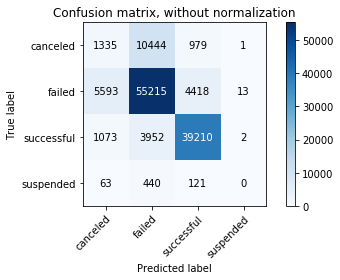

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

Normalized confusion matrix
[[1.04632024e-01 8.18559448e-01 7.67301513e-02 7.83760483e-05]
 [8.57309278e-02 8.46349576e-01 6.77202287e-02 1.99267309e-04]
 [2.42557135e-02 8.93369804e-02 8.86362095e-01 4.52110224e-05]
 [1.00961538e-01 7.05128205e-01 1.93910256e-01 0.00000000e+00]]


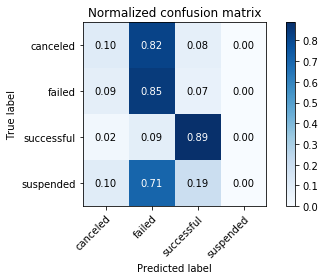

In [33]:
plot_confusion_matrix(actual_values, predictions, y.columns, normalize=True)